<a href="https://colab.research.google.com/github/michaeltiede/family_group_chat/blob/main/Tiede_NLP_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files

# Upload the JSON file to Colab
uploaded = files.upload()

# Assuming your uploaded JSON file has the name 'message.json'
json_file_path = list(uploaded.keys())[0]

# Load JSON data into a pandas DataFrame
df = pd.read_json(json_file_path)

# Save the DataFrame to a CSV file
csv_file_path = 'message_tiede.csv'
df.to_csv(csv_file_path, index=False)

# Print a message indicating the successful conversion
print(f'CSV file saved at {csv_file_path}')

# Filter non-message rows
df = df[df['text'].notnull() & (df['text'] != '')]




Saving message.json to message.json


/usr/local/lib/python3.10/dist-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


CSV file saved at message_tiede.csv


In [43]:
#!pip install emoji

# import pandas as pd

# # Assuming your JSON data is in a file named 'data.json'
# json_file_path = '/Users/michaeltiede/Desktop/Grad_School/Programming_INFO/Tiede_groupme_messages/json_tiede_files/json_23003978_file/message.json'
# # Load JSON data into a pandas DataFrame
# df = pd.read_json(json_file_path)

# # Save the DataFrame to a CSV file
# csv_file_path = '/Users/michaeltiede/Desktop/Grad_School/Programming_INFO/Tiede_groupme_messages/message_tiede.csv'
# df.to_csv(csv_file_path, index=False)

# # Print a message indicating the successful conversion
# print(f'CSV file saved at {csv_file_path}')

# #filter non message rows
# df = df[df['text'].notnull() & (df['text'] != '')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [44]:
#!pip install emoji
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import emoji
import gensim
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [46]:
#df = pd.read_csv('/Users/michaeltiede/Desktop/Grad_School/Programming_INFO/Tiede_groupme_messages/Tiede_messages.csv')

#/Users/michaeltiede/Desktop/Grad_School/Programming_INFO/Tiede_groupme_messages
df1 = df[['name','sender_id' ,'text']]
df1 = df1[df1['text'].notnull() & (df1['text'] != '')]

df1_lines = df1.groupby(['name', 'sender_id']).size().reset_index(name='message_count')
df1_lines = df1_lines.sort_values(by=['message_count'], ascending=False)[:30]
#df1_lines['text'] = df1_lines['text'].astype(str)
df1_lines = df1_lines[df1_lines['name'] != 'GroupMe']
#df1_lines= df1_lines.drop('GroupMe')

df2_lines = df1_lines.reset_index(level=0)

df2_lines.head(30)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,index,name,sender_id,message_count
0,26,Marilynn Tiede,39382972,2618
1,34,Sarah Buchanan,39372931,2435
2,27,Mark Tiede,39372978,1888
3,21,Julie T,39372631,1687
4,20,Jen Sundrud,39373556,869
5,33,Rachel T,15146556,827
6,5,Connie F Tiede,39372965,648
7,2,Angi,50976702,457
8,29,Michael Tiede,36675692,427
9,23,Linnea Tiede,9930815,345


In [47]:
#!pip install plotly_express
import plotly_express as px
import plotly.graph_objects as go

fig = px.bar(df2_lines, x='message_count',
                        y= 'name', orientation = 'h',
                        color=df2_lines['name'],
                        title='Family messages', text='message_count',
                        template = 'plotly_white'
                        #color_discrete_map={'Fire':'#C43A3A', 'Water':'#3A7FC4', 'Earth':'#BB653B'},
            )

text_labels = df2_lines['message_count'].astype(str)

fig.update_xaxes(title_text='Number of Messages',tickfont=dict(size=14))
fig.update_yaxes(title_text='Names',tickfont=dict(size=8))
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



In [48]:
top_character_names = df1_lines['name'].unique()
#top_character_list = name_list.index.unique().tolist()

#top_character_names = df1_lines.index.values

#top_character_names

df_character_sentiment = df1[df1['name'].isin(top_character_names)]
df_character_sentiment = df_character_sentiment[['name', 'text']]
df_character_sentiment['text'] = df_character_sentiment['text'].astype(str)
df_character_sentiment


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



,name,text
0,Marilynn Tiede,NLS plays Dilworth-Glyndon-Felton whom I have ...
1,Marilynn Tiede,I thought their game is on Sat aft at 1:00 pm
2,Marilynn Tiede,Yep - and we are cheering. Class 3A
3,Michael Tiede,New London-spicer in the state football champi...
4,Marilynn Tiede,🤣🤣
...,...,...
14840,Julie T,Concentration!!
14841,Julie T,Nooooooooo!
14842,Julie T,Gentle.....
14843,Julie T,Steady.....


In [49]:
#!pip install nltk
import nltk
nltk.download('punkt')


import re
df_character_sentiment2 = df_character_sentiment['text']
words = df_character_sentiment2.apply(word_tokenize)
sentences = df_character_sentiment2.apply(sent_tokenize)

print(words)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0        [NLS, plays, Dilworth-Glyndon-Felton, whom, I,...
1        [I, thought, their, game, is, on, Sat, aft, at...
2           [Yep, -, and, we, are, cheering, ., Class, 3A]
3        [New, London-spicer, in, the, state, football,...
4                                                     [🤣🤣]
                               ...                        
14840                                [Concentration, !, !]
14841                                      [Nooooooooo, !]
14842                                      [Gentle, .....]
14843                                      [Steady, .....]
14847                                           [Hello, !]
Name: text, Length: 13896, dtype: object


In [50]:
#remove punctuation

import re

df_character_sentiment['clean_text'] = df_character_sentiment['text'].apply(lambda s: ' '.join(re.sub(r'\W', ' ', s).split()))

# df_character_sentiment['clean_text'] = df_character_sentiment['text'].apply(lambda s: ' '.join(re.sub(r"[.,!\"?:;\-=\'...zz\(\)@#_\']", " ", s).split()))

# df_character_sentiment['clean_text'] = df_character_sentiment['text'].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...zz@#_]", " ", s).split()))
df_character_sentiment[["clean_text", "text"]].head(100)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,clean_text,text
0,NLS plays Dilworth Glyndon Felton whom I have ...,NLS plays Dilworth-Glyndon-Felton whom I have ...
1,I thought their game is on Sat aft at 1 00 pm,I thought their game is on Sat aft at 1:00 pm
2,Yep and we are cheering Class 3A,Yep - and we are cheering. Class 3A
3,New London spicer in the state football champi...,New London-spicer in the state football champi...
4,,🤣🤣
...,...,...
107,,🤣🤣🤣
108,,😂
110,I ll bite What was it,I’ll bite. What was it?
111,HAHAHAHHAHAHAHHAHA,HAHAHAHHAHAHAHHAHA


In [51]:
# from collections import Counter
# #tokenize
# def tokenize_text(text):
#     tokens = word_tokenize(text)
#     return tokens

# df_character_sentiment["clean_text_words"]=df_character_sentiment["clean_text"].apply(tokenize_text)

# df_character_sentiment.head(100)

# df_character_sentiment["clean_text_words"].astype('string')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [52]:
#!pip install stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

# Assuming df_character_sentiment is a DataFrame column containing text data

custom_stopwords = ['uh', '&', '-', 'll', 'https', 'mp4', 'v', '23003978', 'com']  # Include the apostrophe
stop = set(stopwords.words('english')).union(set(custom_stopwords))
print(stop)


{'these', 'com', 'me', 'she', 'most', 'uh', 'be', 'v', '23003978', 'haven', 'all', 'above', 'below', 'i', 'were', 'was', 'couldn', 'up', 'you', 'll', '&', 'should', "you'd", 'ain', 'and', 've', "wouldn't", 'only', 'which', 'having', 'to', 'myself', 'or', 'same', 'on', 'theirs', 'over', 'we', 'further', 'here', 'in', 'mustn', 'mp4', 'd', 'no', "wasn't", 'hasn', 'weren', 'off', 'under', 'themselves', 'have', "couldn't", 'for', 'those', 'against', 'aren', 'more', 'why', 'if', "haven't", "that'll", 'my', 'nor', 'about', 'mightn', 'doesn', 'from', '-', "it's", 'had', 'does', 'as', 'with', 'won', 'but', 'when', 'ma', 'a', 'has', 'o', 'itself', 'by', 'at', 'after', 'their', "aren't", 'her', 'whom', 'yourself', 'through', 's', 'm', "hadn't", 'ours', 'now', 'isn', 'than', 'out', 'can', "weren't", 'during', 'shan', 'our', 'while', 'where', 'your', 'them', "you've", 'it', "isn't", "won't", 'y', "shan't", 'don', 'very', 'not', 'who', 'into', 'am', 'too', 'he', 'this', 'some', 't', 'until', 'what',

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
#stopwords

def rem_en(input_txt):
    words_2 = input_txt.lower().split()
    noise_free_words = [word for word in words_2 if word not in stop]
    noise_free_text = " ".join(noise_free_words)
    return noise_free_text

df_character_sentiment["clean_text"] = df_character_sentiment["clean_text"].apply(lambda s: rem_en(s))
df_character_sentiment[["text","clean_text"]]

df_character_sentiment["clean_text"].astype('string')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0        nls plays dilworth glyndon felton never heard ...
1                             thought game sat aft 1 00 pm
2                                    yep cheering class 3a
3        new london spicer state football championship ...
4                                                         
                               ...                        
14840                                        concentration
14841                                           nooooooooo
14842                                               gentle
14843                                               steady
14847                                                hello
Name: clean_text, Length: 13896, dtype: string

In [54]:
from collections import Counter
#tokenize
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

df_character_sentiment["clean_text_words"]=df_character_sentiment["clean_text"].apply(tokenize_text)

df_character_sentiment.head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,name,text,clean_text,clean_text_words
0,Marilynn Tiede,NLS plays Dilworth-Glyndon-Felton whom I have ...,nls plays dilworth glyndon felton never heard ...,"[nls, plays, dilworth, glyndon, felton, never,..."
1,Marilynn Tiede,I thought their game is on Sat aft at 1:00 pm,thought game sat aft 1 00 pm,"[thought, game, sat, aft, 1, 00, pm]"
2,Marilynn Tiede,Yep - and we are cheering. Class 3A,yep cheering class 3a,"[yep, cheering, class, 3a]"
3,Michael Tiede,New London-spicer in the state football champi...,new london spicer state football championship ...,"[new, london, spicer, state, football, champio..."
4,Marilynn Tiede,🤣🤣,,[]
5,Marilynn Tiede,I got it - very funny Sarah - & also thought h...,got funny sarah also thought looked like burt ...,"[got, funny, sarah, also, thought, looked, lik..."
6,Sarah Buchanan,Nobody got my Burt Reynold reference?,nobody got burt reynold reference,"[nobody, got, burt, reynold, reference]"
7,E,I like the stache too! Grow it back,like stache grow back,"[like, stache, grow, back]"
8,Sarah Buchanan,There’s my Markie the Wolf!,markie wolf,"[markie, wolf]"
9,Mark Tiede,All gone… finally,gone finally,"[gone, finally]"


In [55]:

all = [word for sublist in df_character_sentiment["clean_text_words"] for word in sublist]

word_freq = Counter(all)
word_freqdict= dict(word_freq)
word_freqdf = pd.DataFrame(list(word_freqdict.items()), columns = ['Word', 'Frequency'])
word_freqdf= word_freqdf.sort_values(by='Frequency', ascending =False)
word_freqdf=word_freqdf.reset_index(drop=True)

word_freqdf.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Word,Frequency
0,happy,898
1,great,591
2,birthday,533
3,love,508
4,good,465
5,today,462
6,get,452
7,day,448
8,know,439
9,like,432


In [56]:
# !pip install --upgrade wordcloud
# !pip install --upgrade pillow
# !pip install pillow==9.5
#!pip install --upgrade matplotlib wordcloud


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



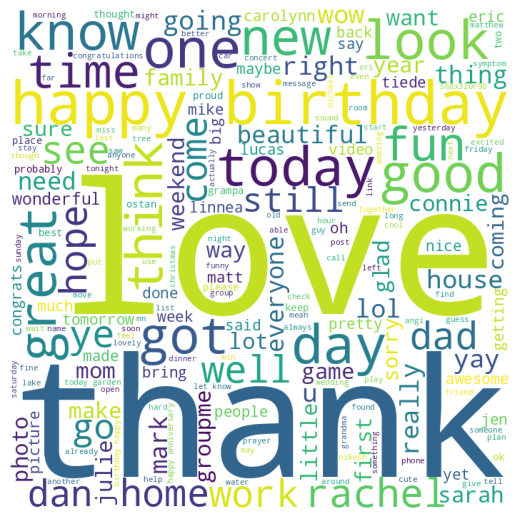

In [57]:
# !pip install --upgrade wordcloud

from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

all_words = ''

#looping through all incidents and joining them to on text, to extract most common words
for arg in df_character_sentiment["clean_text"].astype('string'):

    tokens = arg.split()

    all_words += " ".join(tokens)+" "



wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                min_font_size = 10
                ).generate(all_words)

#plot image
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


In [58]:
#stemming

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def stem_text(text):
    if isinstance(text, list):
        text = ' '.join(text)
    return ' '.join([stemmer.stem(word)
for word in text.split()])

df_character_sentiment["text_stemming"] = df_character_sentiment["clean_text_words"].apply(stem_text)

df_character_sentiment[["text_stemming", "clean_text_words", "text"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,text_stemming,clean_text_words,text
0,nl play dilworth glyndon felton never heard un...,"[nls, plays, dilworth, glyndon, felton, never,...",NLS plays Dilworth-Glyndon-Felton whom I have ...
1,thought game sat aft 1 00 pm,"[thought, game, sat, aft, 1, 00, pm]",I thought their game is on Sat aft at 1:00 pm
2,yep cheer class 3a,"[yep, cheering, class, 3a]",Yep - and we are cheering. Class 3A
3,new london spicer state footbal championship t...,"[new, london, spicer, state, football, champio...",New London-spicer in the state football champi...
4,,[],🤣🤣
...,...,...,...
14840,concentr,[concentration],Concentration!!
14841,nooooooooo,[nooooooooo],Nooooooooo!
14842,gentl,[gentle],Gentle.....
14843,steadi,[steady],Steady.....


In [59]:
#normalize/lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lem = WordNetLemmatizer()

def lemmatizer(text):
    lemm_text = [wordnet_lem.lemmatize(word) for word in text]
    return lemm_text

#currently not lemmatizing off of the stemmed version but the clean word version
df_character_sentiment['clean_text_lemma']=df_character_sentiment['clean_text_words'].apply(lambda x:lemmatizer(x))

df_character_sentiment[["clean_text_lemma","text_stemming", "clean_text_words", "text"]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_text_lemma,text_stemming,clean_text_words,text
0,"[nls, play, dilworth, glyndon, felton, never, ...",nl play dilworth glyndon felton never heard un...,"[nls, plays, dilworth, glyndon, felton, never,...",NLS plays Dilworth-Glyndon-Felton whom I have ...
1,"[thought, game, sat, aft, 1, 00, pm]",thought game sat aft 1 00 pm,"[thought, game, sat, aft, 1, 00, pm]",I thought their game is on Sat aft at 1:00 pm
2,"[yep, cheering, class, 3a]",yep cheer class 3a,"[yep, cheering, class, 3a]",Yep - and we are cheering. Class 3A
3,"[new, london, spicer, state, football, champio...",new london spicer state footbal championship t...,"[new, london, spicer, state, football, champio...",New London-spicer in the state football champi...
4,[],,[],🤣🤣
...,...,...,...,...
14840,[concentration],concentr,[concentration],Concentration!!
14841,[nooooooooo],nooooooooo,[nooooooooo],Nooooooooo!
14842,[gentle],gentl,[gentle],Gentle.....
14843,[steady],steadi,[steady],Steady.....


In [60]:
#calculating sentiment score
sid = SentimentIntensityAnalyzer()
df_character_sentiment.reset_index(inplace=True, drop=True)
df_character_sentiment[['neg', 'neu', 'pos', 'compound']] = df_character_sentiment['clean_text'].apply(sid.polarity_scores).apply(pd.Series)

yy= df_character_sentiment
Michael = yy[yy.name == 'Michael Tiede']
#xx = df_character_sentiment.groupby(["name"]).mean()
#xx1 = xx.sort_values(by=['compound'], ascending=False)[:30]


#xx1.head(30)
df_character_sentiment.head(100)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,name,text,clean_text,clean_text_words,text_stemming,clean_text_lemma,neg,neu,pos,compound
0,Marilynn Tiede,NLS plays Dilworth-Glyndon-Felton whom I have ...,nls plays dilworth glyndon felton never heard ...,"[nls, plays, dilworth, glyndon, felton, never,...",nl play dilworth glyndon felton never heard un...,"[nls, play, dilworth, glyndon, felton, never, ...",0.0,0.618,0.382,0.7003
1,Marilynn Tiede,I thought their game is on Sat aft at 1:00 pm,thought game sat aft 1 00 pm,"[thought, game, sat, aft, 1, 00, pm]",thought game sat aft 1 00 pm,"[thought, game, sat, aft, 1, 00, pm]",0.0,1.000,0.000,0.0000
2,Marilynn Tiede,Yep - and we are cheering. Class 3A,yep cheering class 3a,"[yep, cheering, class, 3a]",yep cheer class 3a,"[yep, cheering, class, 3a]",0.0,0.267,0.733,0.6705
3,Michael Tiede,New London-spicer in the state football champi...,new london spicer state football championship ...,"[new, london, spicer, state, football, champio...",new london spicer state footbal championship t...,"[new, london, spicer, state, football, champio...",0.0,0.674,0.326,0.4404
4,Marilynn Tiede,🤣🤣,,[],,[],0.0,0.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
95,Jen Sundrud,🤣🤣🤣,,[],,[],0.0,0.000,0.000,0.0000
96,Sarah Buchanan,😂,,[],,[],0.0,0.000,0.000,0.0000
97,Sarah Buchanan,I’ll bite. What was it?,bite,[bite],bite,[bite],0.0,1.000,0.000,0.0000
98,Mark Tiede,HAHAHAHHAHAHAHHAHA,hahahahhahahahhaha,[hahahahhahahahhaha],hahahahhahahahhaha,[hahahahhahahahhaha],0.0,1.000,0.000,0.0000


In [61]:
def get_sentiment(text):

    scores = sid.polarity_scores(text)

    sentiment = 0 if scores['pos'] <= 0 else 1

    return sentiment

df_character_sentiment['sentiment'] = df_character_sentiment['clean_text'].apply(get_sentiment)

df_character_sentiment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,name,text,clean_text,clean_text_words,text_stemming,clean_text_lemma,neg,neu,pos,compound,sentiment
0,Marilynn Tiede,NLS plays Dilworth-Glyndon-Felton whom I have ...,nls plays dilworth glyndon felton never heard ...,"[nls, plays, dilworth, glyndon, felton, never,...",nl play dilworth glyndon felton never heard un...,"[nls, play, dilworth, glyndon, felton, never, ...",0.0,0.618,0.382,0.7003,1
1,Marilynn Tiede,I thought their game is on Sat aft at 1:00 pm,thought game sat aft 1 00 pm,"[thought, game, sat, aft, 1, 00, pm]",thought game sat aft 1 00 pm,"[thought, game, sat, aft, 1, 00, pm]",0.0,1.000,0.000,0.0000,0
2,Marilynn Tiede,Yep - and we are cheering. Class 3A,yep cheering class 3a,"[yep, cheering, class, 3a]",yep cheer class 3a,"[yep, cheering, class, 3a]",0.0,0.267,0.733,0.6705,1
3,Michael Tiede,New London-spicer in the state football champi...,new london spicer state football championship ...,"[new, london, spicer, state, football, champio...",new london spicer state footbal championship t...,"[new, london, spicer, state, football, champio...",0.0,0.674,0.326,0.4404,1
4,Marilynn Tiede,🤣🤣,,[],,[],0.0,0.000,0.000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...
13891,Julie T,Concentration!!,concentration,[concentration],concentr,[concentration],0.0,1.000,0.000,0.0000,0
13892,Julie T,Nooooooooo!,nooooooooo,[nooooooooo],nooooooooo,[nooooooooo],0.0,1.000,0.000,0.0000,0
13893,Julie T,Gentle.....,gentle,[gentle],gentl,[gentle],0.0,0.000,1.000,0.4404,1
13894,Julie T,Steady.....,steady,[steady],steadi,[steady],0.0,1.000,0.000,0.0000,0


In [62]:
import plotly_express as px
import plotly.graph_objects as go


average_scores = df_character_sentiment.groupby('name')['compound'].agg(['mean', 'count']).reset_index()

# Rename columns for clarity
average_scores.columns = ['name', 'average_compound_score', 'message_count']
average_scores = average_scores.sort_values(by='average_compound_score', ascending=True)


average_scores

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,name,average_compound_score,message_count
2,Angi Buchanan Ruziska,0.135000,7
23,Rachel T,0.152294,827
0,Alex Ruziska 2,0.155453,15
19,Michael Tiede,0.173837,427
17,Mark Tiede,0.195848,1888
22,Paige Perreira,0.199254,35
8,Eric Buchanan,0.200703,31
15,Lucas Tiede,0.201033,215
6,Dan TD Tiede,0.231601,291
10,Jen Buchanan,0.234728,293


In [63]:



fig = px.bar(average_scores, x='average_compound_score', y='name',
             labels={'compound': 'Average Compound Score'},
             title='Average Sentiment Scores by Person',
             orientation= 'h',
             color_discrete_sequence=['skyblue'])

# Show the plot

fig.update_xaxes(title_text='Sentiment Score',tickfont=dict(size=14))
fig.update_yaxes(title_text='Names',tickfont=dict(size=8))
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
# fig.show()



# fig = px.bar(df_character_sentiment, x='text', y= 'name', orientation = 'h',
#              color=df_character_sentiment['name'], title='Family messages',
#              template = 'plotly_white',
#              #color_discrete_map={'Fire':'#C43A3A', 'Water':'#3A7FC4', 'Earth':'#BB653B'},
#              )
# fig.update_xaxes(title_text='Number of lines')
# fig.update_yaxes(title_text='Names')
# fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



In [64]:
import seaborn as sns
# Calculate the percentage of each sentiment
sentiment_percentage = df_character_sentiment['sentiment'].value_counts(normalize=True) * 100

# Create a Pie chart using Plotly Express
fig = px.pie(sentiment_percentage,
             values=sentiment_percentage.values,
             names=sentiment_percentage.index,
             title='Percentage of Sentiment Values',
             labels={'label': 'Sentiment', 'value': 'Percentage'},
             color_discrete_sequence=['green', 'red'])

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



In [65]:
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract date from datetime
# df['month_day'] = df['created_at'].dt.strftime('%B %d')
df['month_day'] = df['created_at'].dt.strftime('%m-%d')
df['month_year'] = df['created_at'].dt.strftime('%m-%y')
df['date'] = df['created_at'].dt.date
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['month_name'] = df['created_at'].dt.strftime('%B')
df['day_of_year'] = df['created_at'].dt.dayofyear

df[['month_year','date','month_day' ,'month','month_name','year','day_of_year']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,month_year,date,month_day,month,month_name,year,day_of_year
0,12-22,2022-12-02,12-02,12,December,2022,336
1,12-22,2022-12-02,12-02,12,December,2022,336
2,12-22,2022-12-02,12-02,12,December,2022,336
3,12-22,2022-12-02,12-02,12,December,2022,336
4,12-22,2022-12-01,12-01,12,December,2022,335
...,...,...,...,...,...,...,...
14844,07-16,2016-07-07,07-07,7,July,2016,189
14845,07-16,2016-07-07,07-07,7,July,2016,189
14846,07-16,2016-07-07,07-07,7,July,2016,189
14847,07-16,2016-07-07,07-07,7,July,2016,189


In [66]:
# Group by date and count the number of messages
message_count_by_date = df.groupby(['month','year', 'month_day','month_year','month_name','date','day_of_year']).size().reset_index(name='message_count')
# message_count_by_date[message_count_by_date['month'] == 2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [67]:
message_count_by_year = df.groupby(['year']).size().reset_index(name='message_count')
message_count_by_year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,year,message_count
0,2016,816
1,2017,1515
2,2018,1453
3,2019,1365
4,2020,2463
5,2021,3100
6,2022,3320


In [68]:
fig = px.bar(message_count_by_year, x='year', y='message_count',
              labels={'message_count': 'Number of Messages'},
              title='Messages Count by Year',
              hover_data={'year'},
                          )
fig.update_traces(text=message_count_by_year['message_count'],  # Add text (count) on top of each bar
                textposition='outside')  # Adjust text formatting and position


fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



In [69]:
# first_day_of_month = message_count_by_date[message_count_by_date['day_of_year'] % 30 == 1].copy()
# first_day_of_month['month_day'] = first_day_of_month['day_of_year'].apply(lambda day: f'January {day}' if day <= 31 else f'February {day-31}' if day <= 59 else f'March {day-59}' if day <= 90 else f'April {day-90}' if day <= 120 else f'May {day-120}' if day <= 151 else f'June {day-151}')

# combined_df = pd.concat([message_count_by_date, first_day_of_month])

# fig = px.line(combined_df, x='day_of_year', y='message_count',
#               color='year',  # Separate lines by 'year'
#               labels={'message_count': 'Number of Messages'},
#               title='Messages Count Time Series by Year',
#               markers=True,  # Add markers on data points for better visibility
#               hover_data={'date': '|%B %d'},
#              )

# # Update x-axis tickvals and ticktext
# tickvals = combined_df['day_of_year'].unique()
# ticktext = combined_df['month_day'].unique()

# fig.update_xaxes(tickmode='array', tickvals=tickvals, ticktext=ticktext)

# fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [70]:

# Create a time series line plot using Plotly Express
fig = px.line(message_count_by_date, x='day_of_year', y='message_count',
              color='year',  # Separate lines by 'year'
              labels={'message_count': 'Number of Messages'},
              title='Messages Count Time Series by Year',
              markers=True,  # Add markers on data points for better visibility
              hover_data={'date': '|%B %d'},
                          )

fig.add_annotation(x=135, y=209,
            text="Matt's Graduation! 209 messages (everyone commenting on live stream)",
            showarrow=True,
            arrowhead=1)

fig.add_annotation(x=308, y=135,
            text="Cubs win the World Series!",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x=342, y=81,
            text="Covid Tiede Xmas Celebration planning",
            showarrow=True,
            arrowhead=1)

fig.add_annotation(x=232, y=67,
            text="Fantasy Football draft planning & Monty Python quotes",
            showarrow=True,
            arrowhead=1,
            )

fig.add_annotation(x=80, y=75,
            text="March Madness",
            showarrow=True,
            arrowhead=1,
            )

fig.add_annotation(x=64, y=59,
            text="Big Snowstorm. Up to 8 inches!",
            showarrow=True,
            arrowhead=1,
            )

fig.add_annotation(x=157, y=76,
            text="Rachel announces new job at WNYT in NY",
            showarrow=True,
            arrowhead=1,
            )

fig.add_annotation(x=351, y=75,
            text="Xmas 2021",
            showarrow=True,
            arrowhead=1,
            )


fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



In [71]:

filter = df[(df['year'] == 2021) & (df['month_day'] == '12-17')]

filter = filter[['name','date','year','text']]

filter.head(60)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,name,date,year,text
3656,Linnea Tiede,2021-12-17,2021,Woohoo!!!!!
3657,Jen Sundrud,2021-12-17,2021,It is! The guy who came about the thermostat s...
3658,Linnea Tiede,2021-12-17,2021,Boooooooo
3659,Julie T,2021-12-17,2021,Ok. On our way! 30 minutes
3660,Rachel T,2021-12-17,2021,Here!! Pool does not appear open
3661,Julie T,2021-12-17,2021,￼ The food is on board. I apologize now if the...
3662,GroupMe,2021-12-17,2021,A message was deleted.
3663,GroupMe,2021-12-17,2021,This message has been deleted
3664,Marilynn Tiede,2021-12-17,2021,I will bring towels & washcloths for us & Judy...
3665,E,2021-12-17,2021,I have a bunch of extra towels


In [72]:


fig = px.line(message_count_by_date, x='day_of_year', y='message_count',
              color='year',
              animation_frame='month_name',  # Filter by month
              labels={'message_count': 'Number of Messages'},
              title='Messages Count Time Series by Year',
              markers=True,
              hover_data={'date': '|%B %d'},
            #   range_x=[message_count_by_date['day_of_year'].min(), message_count_by_date['day_of_year'].max()],  # Set initial x-axis range

              )



# Update x-axis tickvals and ticktext if needed

fig.show()




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



In [73]:
# Create a time series line plot using Plotly Express
fig = px.line(message_count_by_date, x='date', y='message_count',
              color='year',  # Separate lines by 'year'
              labels={'message_count': 'Number of Messages'},
              title='Messages Count Time Series by Year',
              markers=True,  # Add markers on data points for better visibility
              hover_data={'date': '|%B %d'}
                          )

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



In [74]:
#LDA Topic Modeling
#!pip install pyldavis
import pyLDAvis.gensim_models as gensimvis
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# from gensim.models import CoherenceModel

#df_character_sentiment['clean_text_lemma'] = df_character_sentiment['clean_text_lemma'].apply(lambda x: [word.split() for word in x])

df_character_sentiment['clean_text_lemma'] = df_character_sentiment['clean_text_lemma'].apply(lambda x: ' '.join(x))

df_character_sentiment['clean_text_lemma']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0        nls play dilworth glyndon felton never heard u...
1                             thought game sat aft 1 00 pm
2                                    yep cheering class 3a
3        new london spicer state football championship ...
4                                                         
                               ...                        
13891                                        concentration
13892                                           nooooooooo
13893                                               gentle
13894                                               steady
13895                                                hello
Name: clean_text_lemma, Length: 13896, dtype: object

In [75]:

# tokenized_documents = df_character_sentiment['clean_text_lemma'].tolist()
# dictionary = Dictionary(tokenized_documents)

tokenized_documents = [doc.split() for doc in df_character_sentiment['clean_text_lemma'].tolist()]

# Create a Gensim Dictionary
dictionary = Dictionary(tokenized_documents)

# Convert each document to a bag of words representation
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [120]:
num_topics = 10

lda_model = LdaModel(corpus = corpus, num_topics=num_topics, id2word=dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [77]:
for topic_id, topic_terms in lda_model.print_topics(num_words=5):
    print(f"Topic {topic_id +1}: {topic_terms}")

Topic 1: 0.027*"yes" + 0.018*"christmas" + 0.014*"weekend" + 0.013*"tiede" + 0.011*"church"
Topic 2: 0.035*"go" + 0.031*"lol" + 0.025*"picture" + 0.024*"beautiful" + 0.016*"congrats"
Topic 3: 0.032*"good" + 0.028*"know" + 0.017*"think" + 0.016*"work" + 0.013*"coming"
Topic 4: 0.021*"awesome" + 0.015*"home" + 0.013*"new" + 0.012*"come" + 0.010*"little"
Topic 5: 0.030*"groupme" + 0.023*"day" + 0.020*"wow" + 0.020*"dan" + 0.017*"wonderful"
Topic 6: 0.099*"happy" + 0.059*"birthday" + 0.025*"yay" + 0.022*"mark" + 0.020*"lucas"
Topic 7: 0.028*"love" + 0.026*"look" + 0.018*"well" + 0.017*"great" + 0.017*"see"
Topic 8: 0.024*"oh" + 0.018*"go" + 0.018*"nice" + 0.018*"5" + 0.014*"michael"
Topic 9: 0.029*"today" + 0.015*"thank" + 0.015*"angi" + 0.014*"sarah" + 0.011*"family"
Topic 10: 0.023*"thanks" + 0.014*"great" + 0.013*"one" + 0.013*"last" + 0.013*"like"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [78]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=dictionary, coherence= 'c_v')
coherence_lda = coherence_model_lda.get_coherence()

print(f"Topic Coherence Score (c_v): {coherence_lda}")
print('\nPerplexity: ', abs(lda_model.log_perplexity(corpus)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic Coherence Score (c_v): 0.3887128939072504

Perplexity:  9.118317156418678


Sentence Generator: Bi-grams & Tri-Grams

In [103]:
#N gram text generation

import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter

# Choose the value of N for N-gram (e.g., N=2 for bigrams, N=3 for trigrams)
N = 3

# Generate N-grams for each row in the DataFrame
df_character_sentiment['n_grams'] = df_character_sentiment['clean_text_words'].apply(lambda tokens: list(ngrams(tokens, N)))

# Count the occurrences of each N-gram
n_gram_counts = Counter(n_gram for n_grams in df_character_sentiment['n_grams'] for n_gram in n_grams)

# # Display the N-grams and their counts
# for n_gram, count in n_gram_counts.items():
#     print(f"{n_gram}: {count} occurrences")


# Display the top 20 N-grams and their counts
print("Top 20 N-grams and their occurrences:")
for idx, (n_gram, count) in enumerate(n_gram_counts.most_common(20), 1):
    print(f"{idx}. {n_gram}: {count} occurrences")


Top 20 N-grams and their occurrences:
1. ('let', 'us', 'know'): 25 occurrences
2. ('happy', 'birthday', 'uncle'): 25 occurrences
3. ('happy', 'birthday', 'grandma'): 24 occurrences
4. ('happy', 'birthday', 'angi'): 21 occurrences
5. ('happy', 'birthday', 'grandpa'): 20 occurrences
6. ('happy', 'birthday', 'carolynn'): 19 occurrences
7. ('happy', 'birthday', 'lucas'): 16 occurrences
8. ('hope', 'great', 'day'): 16 occurrences
9. ('happy', 'belated', 'birthday'): 15 occurrences
10. ('birthday', 'lucas', 'linnea'): 15 occurrences
11. ('happy', 'birthday', 'alex'): 15 occurrences
12. ('birthday', 'uncle', 'dan'): 15 occurrences
13. ('groupme', '2020', '10'): 14 occurrences
14. ('happy', 'birthday', 'dan'): 13 occurrences
15. ('espn', 'tournament', 'challenge'): 13 occurrences
16. ('hippo', 'birdie', 'two'): 13 occurrences
17. ('happy', 'happy', 'birthday'): 12 occurrences
18. ('docs', 'google', 'spreadsheets'): 12 occurrences
19. ('ewe', 'hippo', 'birdie'): 12 occurrences
20. ('happy', 'sp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Bi-Gram Generator

In [104]:
# #bigram generator

# import pandas as pd
# from nltk import ngrams
# from collections import Counter
# import random


# # Flatten the list of bigrams across all rows
# all_bigrams = [bigram for bigrams in df_character_sentiment['n_grams'] for bigram in bigrams]

# # Count the occurrences of each bigram
# bigram_counts = Counter(all_bigrams)

# # Function to generate a sentence based on bigrams
# def generate_sentence(start_word, max_length=40):
#     sentence = [start_word]
#     current_word = start_word

#     for _ in range(max_length - 1):
#         next_options = [word2 for (word1, word2) in bigram_counts.keys() if word1 == current_word]

#         if next_options:
#             next_word = random.choice(next_options)
#             sentence.append(next_word)
#             current_word = next_word
#         else:
#             break

#     return ' '.join(sentence)

# # Generate sentences starting with different words
# for _ in range(2):
#     start_word = random.choice([word1 for (word1, word2) in bigram_counts.keys()])
#     generated_sentence = generate_sentence(start_word)
#     print("Generated Sentence:", generated_sentence)
#     print()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Tri-Gram Generator

In [121]:
#trigram generator

import pandas as pd
from nltk import ngrams
from collections import Counter
import random

# Assuming df_character_sentiment is your DataFrame with 'n_grams' column containing trigrams

# Flatten the list of trigrams across all rows
all_trigrams = [trigram for trigrams in df_character_sentiment['n_grams'] for trigram in trigrams]

# Count the occurrences of each trigram
trigram_counts = Counter(all_trigrams)

# Function to generate a sentence based on trigrams
def generate_sentence(start_words, max_length=20):
    sentence = list(start_words)
    current_words = tuple(start_words)

    for _ in range(max_length - len(start_words)):
        next_options = [word3 for (word1, word2, word3) in trigram_counts.keys() if (word1, word2) == current_words]

        if next_options:
            next_word = random.choice(next_options)
            sentence.append(next_word)
            current_words = (current_words[1], next_word)
        else:
            break

    return ' '.join(sentence)

# Generate sentences starting with different words
for _ in range(5):
    start_words = random.choice([(word1, word2) for (word1, word2, word3) in trigram_counts.keys()])
    generated_sentence = generate_sentence(start_words)
    print("Generated Sentence:", generated_sentence)
    print()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Generated Sentence: play gophers championship hope get final game career oh many mixed emotions win situation

Generated Sentence: profile pics fun scroll see transformation suggestion

Generated Sentence: saw tree branch fell onto road blocked road traffic fall house moroccan table poor hibiscus tree

Generated Sentence: clark rest family joining

Generated Sentence: reservation something family reserved wed thursday nights checking ny eve day



Tri-gram & Bi-gram Sentence Generator

In [118]:

# Generate bigrams and trigrams for each row in the DataFrame
df_character_sentiment['bigrams'] = df_character_sentiment['clean_text_words'].apply(lambda tokens: list(ngrams(tokens, 2)))
df_character_sentiment['trigrams'] = df_character_sentiment['clean_text_words'].apply(lambda tokens: list(ngrams(tokens, 3)))

# Flatten the list of bigrams and trigrams across all rows
all_bigrams = [bigram for bigrams in df_character_sentiment['bigrams'] for bigram in bigrams]
all_trigrams = [trigram for trigrams in df_character_sentiment['trigrams'] for trigram in trigrams]

# Count the occurrences of each bigram and trigram
bigram_counts = Counter(all_bigrams)
trigram_counts = Counter(all_trigrams)

# Function to generate a sentence based on bigrams and trigrams
def generate_sentence(start_words, max_length=30, words_per_line=10):
    sentence = list(start_words)
    current_words = tuple(start_words)

    for _ in range(max_length - len(start_words)):
        # First, try to use trigrams
        next_options = [word3 for (word1, word2, word3) in trigram_counts.keys() if (word1, word2) == current_words]

        if next_options:
            next_word = random.choice(next_options)
            sentence.append(next_word)
            current_words = (current_words[1], next_word)
        else:
            # If trigram not available, fallback to bigrams
            bigram_options = [word2 for (word1, word2) in bigram_counts.keys() if word1 == current_words[1]]

            if bigram_options:
                next_word = random.choice(bigram_options)
                sentence.append(next_word)
                current_words = (current_words[1], next_word)
            else:
                break

  # Break lines after a certain number of words
    sentence_lines = [sentence[i:i+words_per_line] for i in range(0, len(sentence), words_per_line)]


    return '\n'.join([' '.join(line) for line in sentence_lines]) + '.'  # Add a period at the end


# Generate sentences starting with different words
for _ in range(1):
    start_words = random.choice([(word1, word2) for (word1, word2, word3) in trigram_counts.keys()])
    generated_sentence = generate_sentence(start_words)
    print("Generated Sentence:", generated_sentence)
    print()




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Generated Sentence: get flowers anyone else want come see gt gramma gt
grampa yesterday agree also fabulous stories cco finding mn finals
hope win 2 0 shame one give anymore huge wind.



Generate Audio from AI Model

In [117]:
#!pip install gTTS

from gtts import gTTS
import IPython.display as ipd

def generate_and_speak_sentence(start_words, max_length=20, words_per_line=10):
    sentence = [start_words[0].capitalize(), start_words[1]]
    current_words = tuple(start_words)

    for _ in range(max_length - len(start_words)):
        # First, try to use trigrams
        next_options = [word3 for (word1, word2, word3) in trigram_counts.keys() if (word1, word2) == current_words]

        if next_options:
            next_word = random.choice(next_options)
            sentence.append(next_word)
            current_words = (current_words[1], next_word)
        else:
             # If trigram not available, fallback to bigrams
            bigram_options = [word2 for (word1, word2) in bigram_counts.keys() if word1 == current_words[1]]

            if bigram_options:
                next_word = random.choice(bigram_options)
                sentence.append(next_word)
                current_words = (current_words[1], next_word)
            else:
                break

     # Break lines after a certain number of words
    sentence_lines = [sentence[i:i+words_per_line] for i in range(0, len(sentence), words_per_line)]
    full_sentence = ' '.join([' '.join(line) for line in sentence_lines]) + '.'

    # Convert text to speech using gTTS
    tts = gTTS(full_sentence, lang='en')
    tts.save("generated_speech.mp3")

    # Display and play the generated speech
    ipd.Audio("generated_speech.mp3", autoplay=True)

# Generate sentences starting with different words and speak them
for _ in range(1):
    start_words = random.choice([(word1, word2) for (word1, word2, word3) in trigram_counts.keys()])
    print("Generated Sentence:\n")
    generate_and_speak_sentence(start_words)
    print()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Generated Sentence:




END

In [112]:
# @title
#visual LDA
# import gensim
# import gensim.corpora as corpora
# from gensim.corpora import Dictionary
# from gensim.models.coherencemodel import CoherenceModel
# from gensim.models.ldamodel import LdaModel

# from pprint import pprint

# import spacy

# import pickle
# import re
# import pyLDAvis
# import pyLDAvis.gensim

# import matplotlib.pyplot as plt
# import pandas as pd


# id2word = Dictionary(tokenized_documents)
# # Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in tokenized_documents]
# print(corpus[:1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [113]:
# @title
# [[(id2word[i], freq) for i, freq in doc] for doc in corpus[:1]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [115]:
# @title
# Build LDA model
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10,
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=10,
#                                            passes=10,
#                                            alpha='symmetric',
#                                            iterations=100,
#                                            per_word_topics=True)

# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [116]:
# @title
# Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [114]:
# @title
#Creating Topic Distance Visualization
# import pyLDAvis.gensim
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
# vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

